In [1]:
#Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score 
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
import statsmodels.api as sm

In [2]:
#load datasets
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [3]:
#printing summary of train_df
print('Train_df summary:')
print(train_df.info())
train_df.describe()

Train_df summary:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001 entries, 0 to 1000
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   User_ID                     1001 non-null   object 
 1   Age                         1001 non-null   object 
 2   Gender                      1000 non-null   object 
 3   Platform                    1000 non-null   object 
 4   Daily_Usage_Time (minutes)  1000 non-null   float64
 5   Posts_Per_Day               1000 non-null   float64
 6   Likes_Received_Per_Day      1000 non-null   float64
 7   Comments_Received_Per_Day   1000 non-null   float64
 8   Messages_Sent_Per_Day       1000 non-null   float64
 9   Dominant_Emotion            1000 non-null   object 
dtypes: float64(5), object(5)
memory usage: 78.3+ KB
None


,Daily_Usage_Time (minutes),Posts_Per_Day,Likes_Received_Per_Day,Comments_Received_Per_Day,Messages_Sent_Per_Day
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,95.950000,3.321000,39.898000,15.611000,22.560000
std,38.850442,1.914582,26.393867,8.819493,8.516274
min,40.000000,1.000000,5.000000,2.000000,8.000000
25%,65.000000,2.000000,20.000000,8.000000,17.750000
50%,85.000000,3.000000,33.000000,14.000000,22.000000
75%,120.000000,4.000000,55.000000,22.000000,28.000000
max,200.000000,8.000000,110.000000,40.000000,50.000000


In [4]:
#printing summary of test_df
print('Test_df summary:')
print(test_df.info())
test_df.describe()


Test_df summary:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   User_ID                     103 non-null    int64 
 1   Age                         103 non-null    object
 2   Gender                      103 non-null    object
 3   Platform                    103 non-null    object
 4   Daily_Usage_Time (minutes)  103 non-null    int64 
 5   Posts_Per_Day               103 non-null    int64 
 6   Likes_Received_Per_Day      103 non-null    int64 
 7   Comments_Received_Per_Day   103 non-null    int64 
 8   Messages_Sent_Per_Day       103 non-null    int64 
 9   Dominant_Emotion            103 non-null    object
dtypes: int64(6), object(4)
memory usage: 8.2+ KB
None


,User_ID,Daily_Usage_Time (minutes),Posts_Per_Day,Likes_Received_Per_Day,Comments_Received_Per_Day,Messages_Sent_Per_Day
count,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000
mean,521.262136,88.009709,2.864078,33.456311,13.766990,20.388350
std,288.949991,33.979087,1.732326,23.031426,8.107372,7.372755
min,16.000000,40.000000,1.000000,5.000000,2.000000,10.000000
25%,275.000000,60.000000,1.000000,15.000000,7.000000,15.000000
50%,526.000000,75.000000,2.000000,27.000000,12.000000,20.000000
75%,776.000000,105.000000,4.000000,40.000000,19.500000,25.000000
max,997.000000,200.000000,8.000000,110.000000,40.000000,45.000000


In [5]:
#Checking for missing values
print(f'train_df missing data:\n', train_df.isnull().sum())
print(f'test_df missing data:\n', test_df.isnull().sum())

train_df missing data:
 User_ID                       0
Age                           0
Gender                        1
Platform                      1
Daily_Usage_Time (minutes)    1
Posts_Per_Day                 1
Likes_Received_Per_Day        1
Comments_Received_Per_Day     1
Messages_Sent_Per_Day         1
Dominant_Emotion              1
dtype: int64
test_df missing data:
 User_ID                       0
Age                           0
Gender                        0
Platform                      0
Daily_Usage_Time (minutes)    0
Posts_Per_Day                 0
Likes_Received_Per_Day        0
Comments_Received_Per_Day     0
Messages_Sent_Per_Day         0
Dominant_Emotion              0
dtype: int64


In [6]:
#Dropping missing values
train_df.dropna(inplace=True)
print(f'train_df missing data:\n', train_df.isnull().sum())

train_df missing data:
 User_ID                       0
Age                           0
Gender                        0
Platform                      0
Daily_Usage_Time (minutes)    0
Posts_Per_Day                 0
Likes_Received_Per_Day        0
Comments_Received_Per_Day     0
Messages_Sent_Per_Day         0
Dominant_Emotion              0
dtype: int64


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

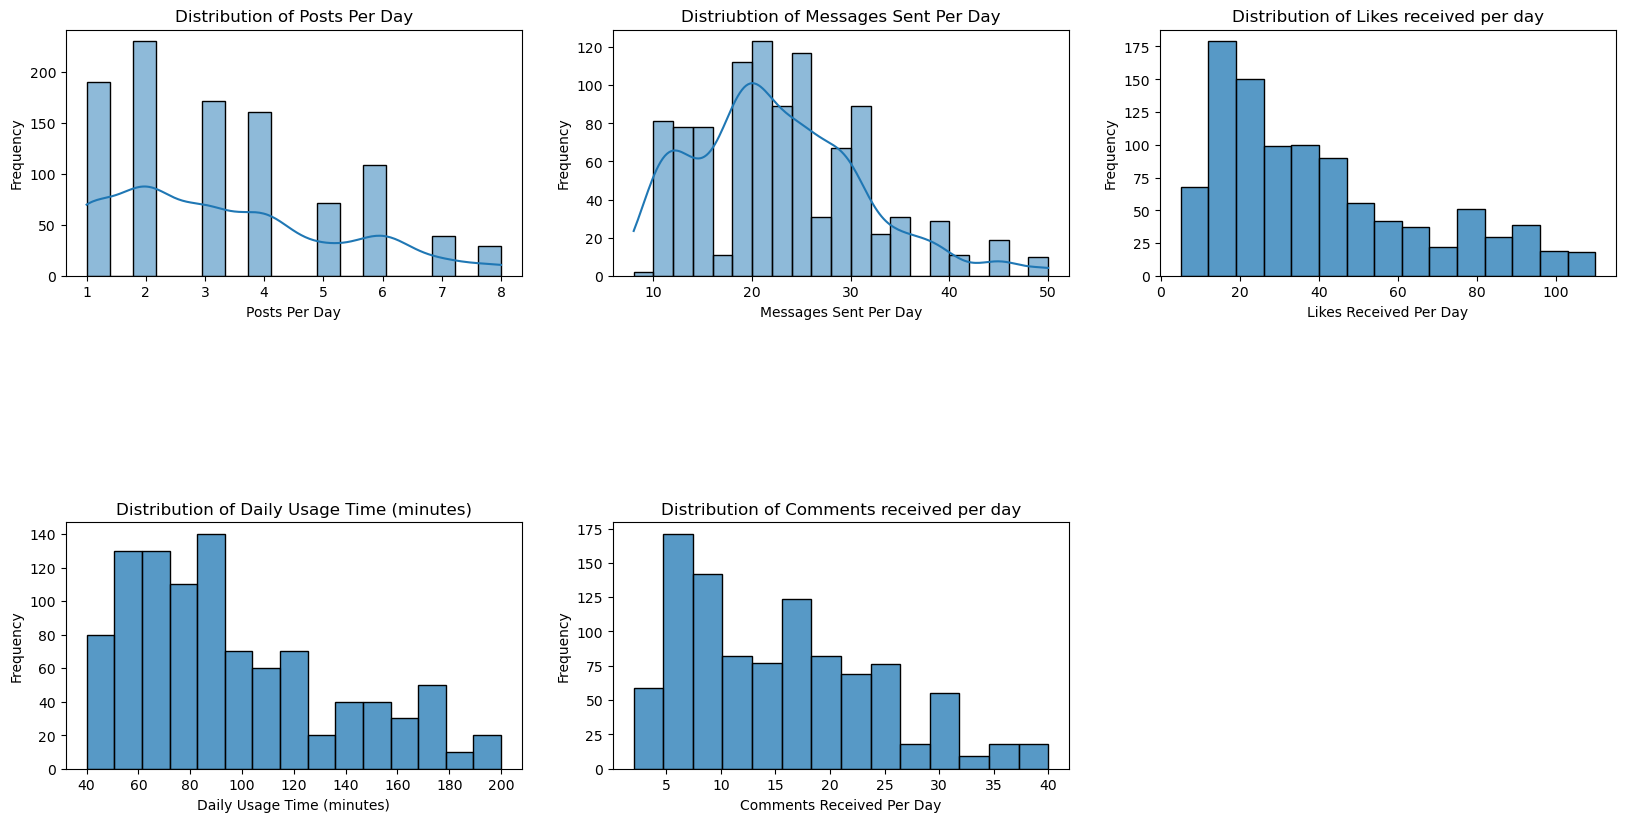

In [7]:
#Multiple Histograms for each numerical column
plt.figure(figsize=(20,16))

plt.subplot(3,3,1)
sns.histplot(train_df['Posts_Per_Day'], kde=True)
plt.title('Distribution of Posts Per Day')
plt.xlabel('Posts Per Day')
plt.ylabel('Frequency')

plt.subplot(3,3,2)
sns.histplot(train_df['Messages_Sent_Per_Day'], kde=True)
plt.title('Distriubtion of Messages Sent Per Day')
plt.xlabel('Messages Sent Per Day')
plt.ylabel('Frequency')

plt.subplot(3,3,3)
sns.histplot(train_df['Likes_Received_Per_Day'])
plt.title('Distribution of Likes received per day')
plt.xlabel('Likes Received Per Day')
plt.ylabel('Frequency')

plt.subplot(3,3,4)
sns.histplot(train_df['Daily_Usage_Time (minutes)'])
plt.title('Distribution of Daily Usage Time (minutes)')
plt.xlabel('Daily Usage Time (minutes)')
plt.ylabel('Frequency')

plt.subplot(3,3,5)
sns.histplot(train_df['Comments_Received_Per_Day'])
plt.title('Distribution of Comments received per day')
plt.xlabel('Comments Received Per Day')
plt.ylabel('Frequency')


plt.subplots_adjust(hspace=1)
plt.show()

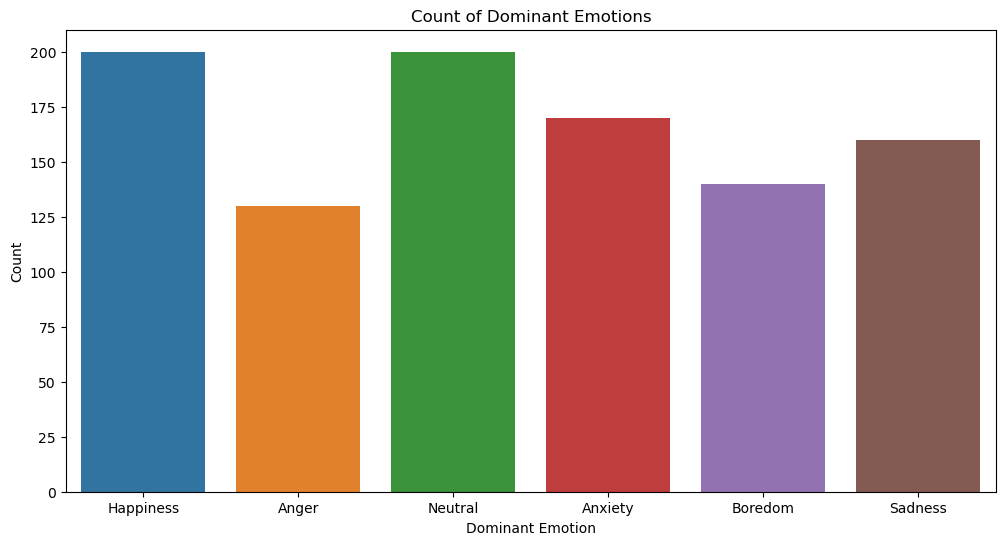

In [8]:
#Countplot of Dominant Emotion
plt.figure(figsize=(12,6))
sns.countplot(data=train_df, x='Dominant_Emotion')
plt.title('Count of Dominant Emotions')
plt.xlabel('Dominant Emotion')
plt.ylabel('Count')
plt.show()

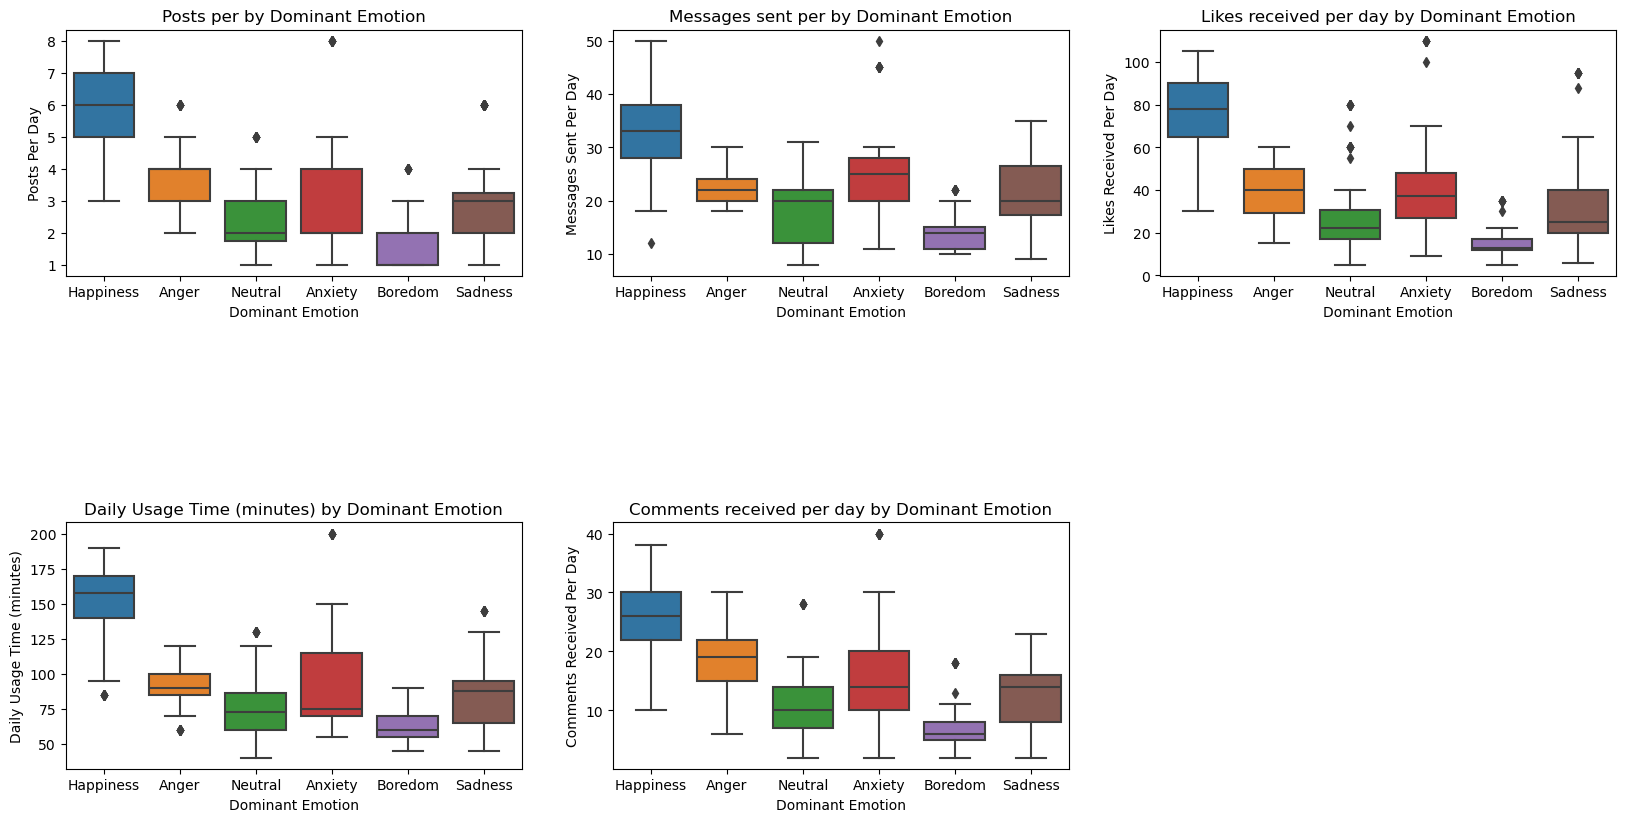

In [9]:
#Multiple box plots for each numerical column
plt.figure(figsize=(20,16))

plt.subplot(3,3,1)
sns.boxplot(data=train_df, x='Dominant_Emotion', y='Posts_Per_Day')
plt.title('Posts per by Dominant Emotion')
plt.xlabel('Dominant Emotion')
plt.ylabel('Posts Per Day')


plt.subplot(3,3,2)
sns.boxplot(data=train_df, x='Dominant_Emotion', y='Messages_Sent_Per_Day')
plt.title('Messages sent per by Dominant Emotion')
plt.xlabel('Dominant Emotion')
plt.ylabel('Messages Sent Per Day')

plt.subplot(3,3,3)
sns.boxplot(data=train_df, x='Dominant_Emotion', y='Likes_Received_Per_Day')
plt.title('Likes received per day by Dominant Emotion')
plt.xlabel('Dominant Emotion')
plt.ylabel('Likes Received Per Day')

plt.subplot(3,3,4)
sns.boxplot(data=train_df, x='Dominant_Emotion', y='Daily_Usage_Time (minutes)')
plt.title('Daily Usage Time (minutes) by Dominant Emotion')
plt.xlabel('Dominant Emotion')
plt.ylabel('Daily Usage Time (minutes)')

plt.subplot(3,3,5)
sns.boxplot(data=train_df, x='Dominant_Emotion', y='Comments_Received_Per_Day')
plt.title('Comments received per day by Dominant Emotion')
plt.xlabel('Dominant Emotion')
plt.ylabel('Comments Received Per Day')


plt.subplots_adjust(hspace=1)
plt.show()

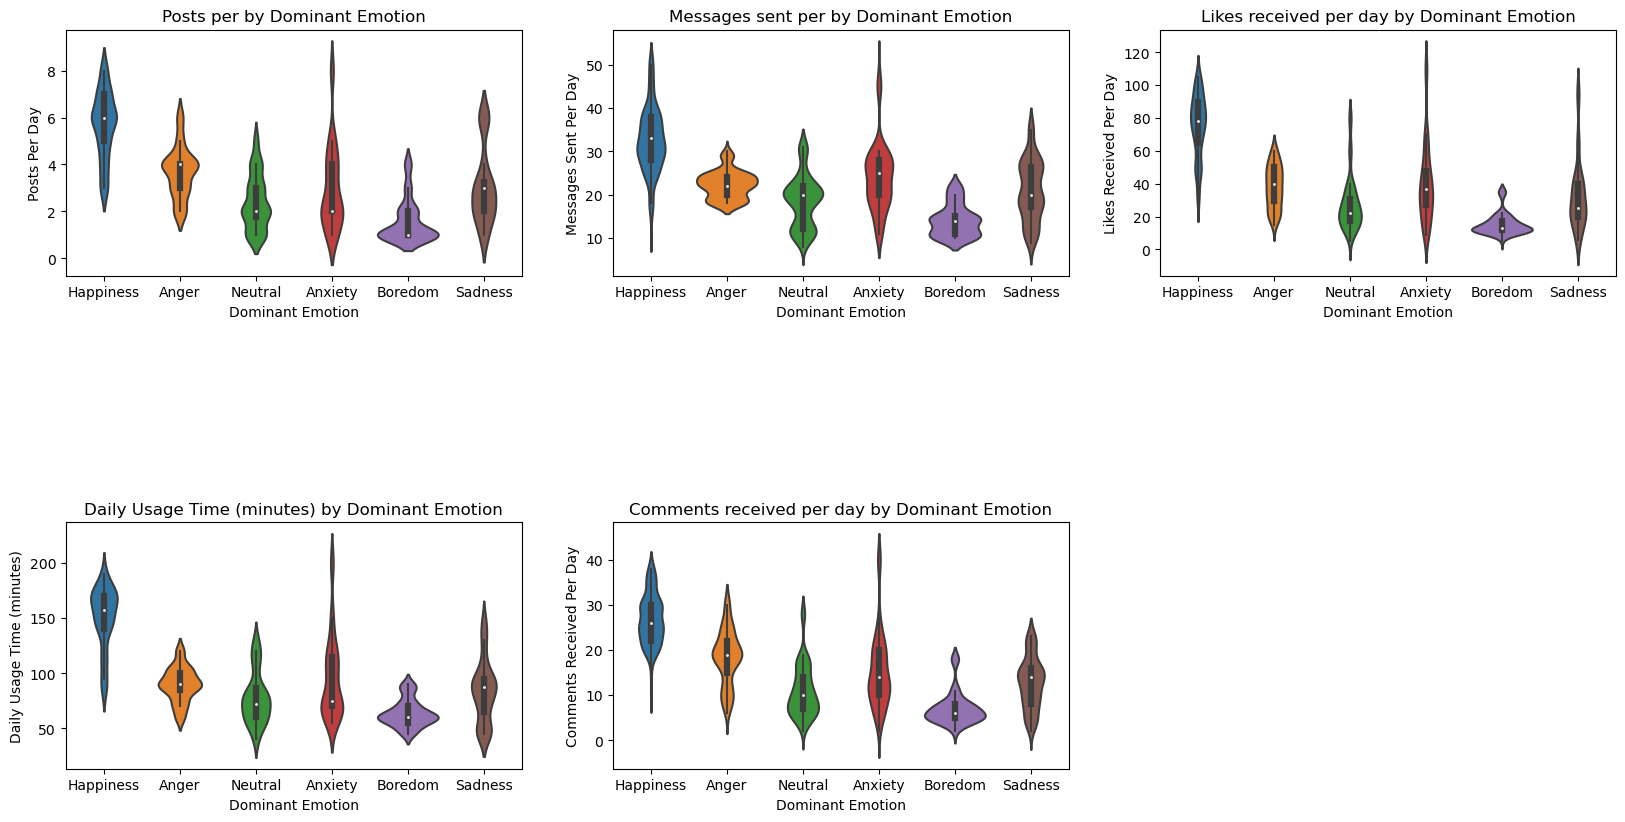

In [10]:
#Multiple ViolinPlots for each numerical column by Dominant Emotion.
plt.figure(figsize=(20,16))

plt.subplot(3,3,1)
sns.violinplot(data=train_df, x='Dominant_Emotion', y='Posts_Per_Day')
plt.title('Posts per by Dominant Emotion')
plt.xlabel('Dominant Emotion')
plt.ylabel('Posts Per Day')


plt.subplot(3,3,2)
sns.violinplot(data=train_df, x='Dominant_Emotion', y='Messages_Sent_Per_Day')
plt.title('Messages sent per by Dominant Emotion')
plt.xlabel('Dominant Emotion')
plt.ylabel('Messages Sent Per Day')

plt.subplot(3,3,3)
sns.violinplot(data=train_df, x='Dominant_Emotion', y='Likes_Received_Per_Day')
plt.title('Likes received per day by Dominant Emotion')
plt.xlabel('Dominant Emotion')
plt.ylabel('Likes Received Per Day')

plt.subplot(3,3,4)
sns.violinplot(data=train_df, x='Dominant_Emotion', y='Daily_Usage_Time (minutes)')
plt.title('Daily Usage Time (minutes) by Dominant Emotion')
plt.xlabel('Dominant Emotion')
plt.ylabel('Daily Usage Time (minutes)')

plt.subplot(3,3,5)
sns.violinplot(data=train_df, x='Dominant_Emotion', y='Comments_Received_Per_Day')
plt.title('Comments received per day by Dominant Emotion')
plt.xlabel('Dominant Emotion')
plt.ylabel('Comments Received Per Day')


plt.subplots_adjust(hspace=1)
plt.show()

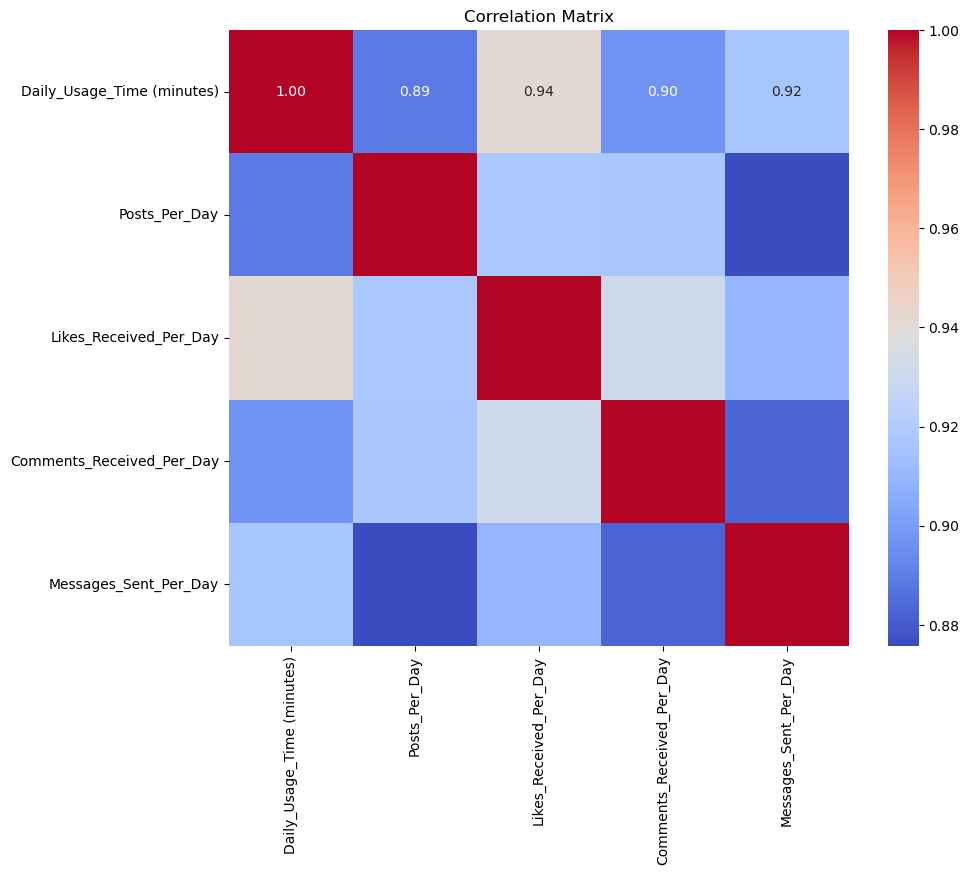

In [11]:
#Creating a heatmap of correlation matrix for numerical columns
numerical_columns = train_df.select_dtypes(include=[np.number]).columns

corr_matrix = train_df[numerical_columns].corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

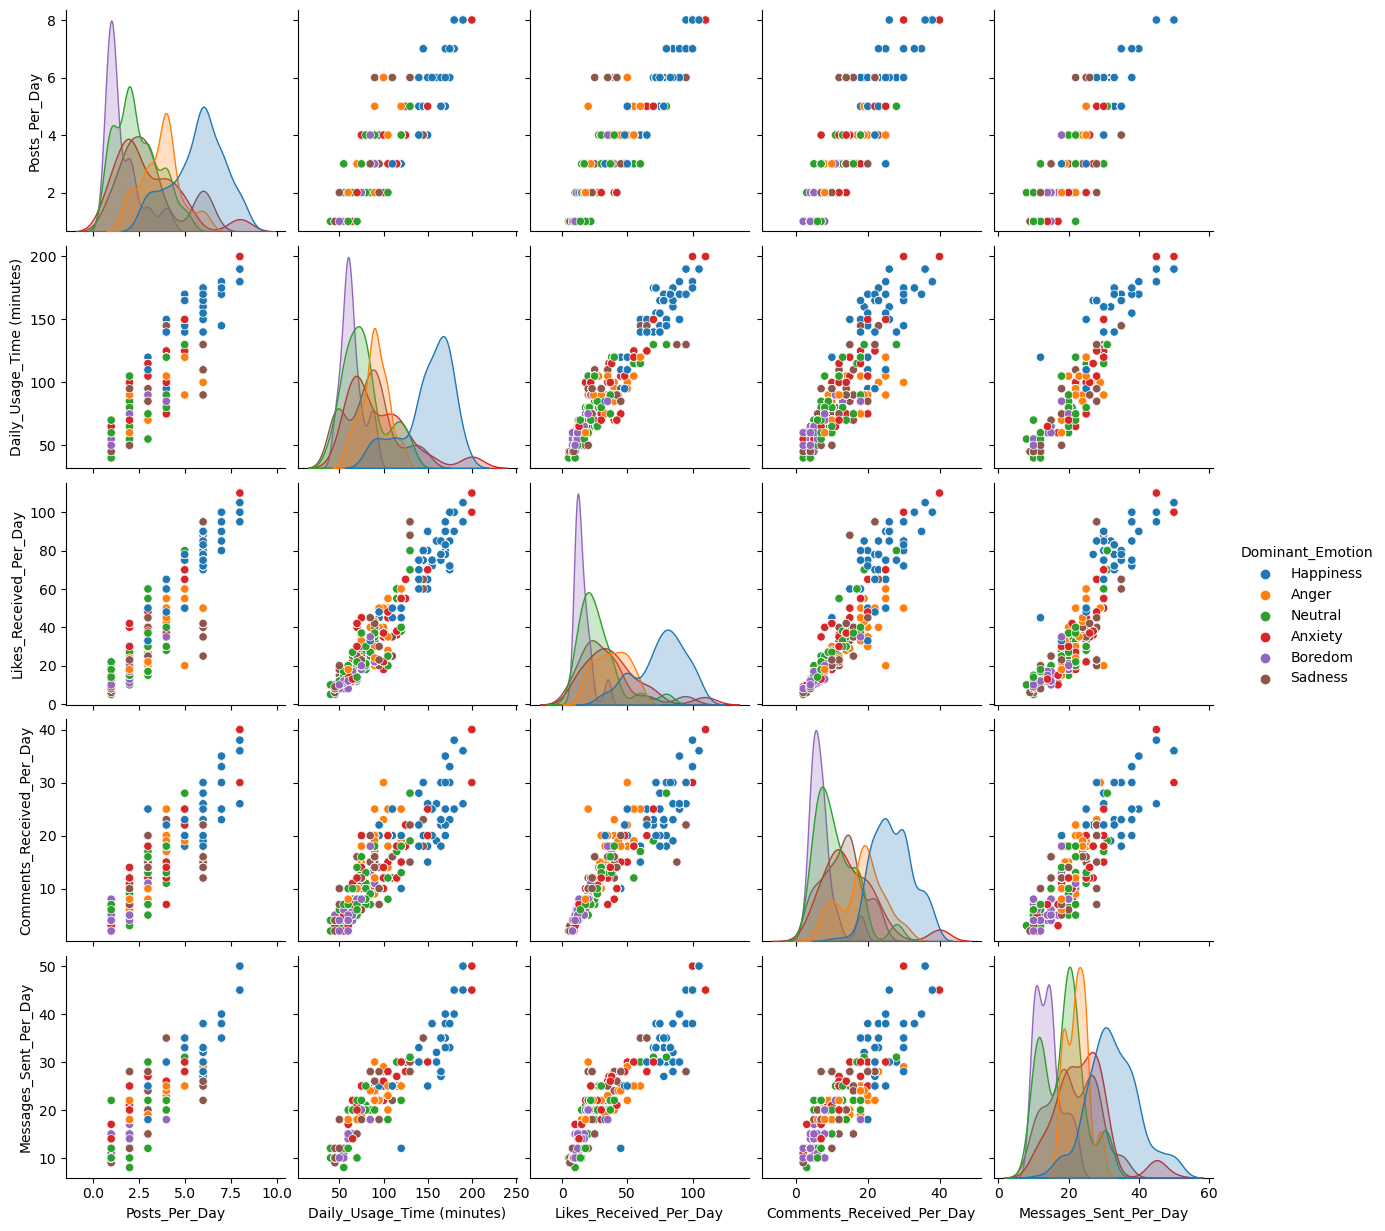

In [12]:
#Creating a pairplot for numerical columns by Dominant Emotion
sns.pairplot(train_df[['Posts_Per_Day', 'Daily_Usage_Time (minutes)', 'Likes_Received_Per_Day', 
                       'Comments_Received_Per_Day', 'Messages_Sent_Per_Day', 'Dominant_Emotion']], 
             hue='Dominant_Emotion', diag_kind='kde')

plt.show()

In [13]:
#Encode the target variable
label_encoder = LabelEncoder()
train_df['Dominant_Emotion_Encoded'] = label_encoder.fit_transform(train_df['Dominant_Emotion'])

In [14]:
print('Encoded Emotion:', train_df['Dominant_Emotion_Encoded'].unique())
print('\nOriginal Emotion:', train_df['Dominant_Emotion'].unique())

Encoded Emotion: [3 0 4 1 2 5]

Original Emotion: ['Happiness' 'Anger' 'Neutral' 'Anxiety' 'Boredom' 'Sadness']


In [15]:
#Define the features and target variable
X = train_df[['Posts_Per_Day', 'Daily_Usage_Time (minutes)', 'Likes_Received_Per_Day', 
              'Comments_Received_Per_Day', 'Messages_Sent_Per_Day']]
y = train_df['Dominant_Emotion_Encoded']

In [16]:
#Splitting the data into train and test sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)


In [17]:
#Initializing and fitting Logistic Regression Model
log_reg = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=200)
log_reg.fit(X_train, y_train)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=200, multi_class='multinomial')

In [18]:
#Predicting on test set
y_pred_log_reg = log_reg.predict(X_test)

In [19]:
#Printing classification report
print('Logistic Regression Classification Report:')
print(classification_report(y_test, y_pred_log_reg))

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.46      0.42      0.44        26
           1       0.71      0.59      0.64        41
           2       0.59      0.71      0.65        28
           3       0.59      0.91      0.72        35
           4       0.44      0.33      0.38        42
           5       0.27      0.21      0.24        28

    accuracy                           0.54       200
   macro avg       0.51      0.53      0.51       200
weighted avg       0.52      0.54      0.52       200



In [20]:
#Printing confusion matrix
print('Logistic Regression Confusion Matrix:')
print(confusion_matrix(y_test, y_pred_log_reg))

Logistic Regression Confusion Matrix:
[[11  0  0  8  1  6]
 [ 1 24  3  9  1  3]
 [ 3  0 20  0  5  0]
 [ 2  0  0 32  0  1]
 [ 3  8  7  4 14  6]
 [ 4  2  4  1 11  6]]


In [21]:
#Fitting a multinomial logisitic regression model using statsmodels
x_with_const = sm.add_constant(X_train)
logit_model = sm.MNLogit(y_train, x_with_const).fit()
print(logit_model.summary())

Optimization terminated successfully.
         Current function value: 1.220381
         Iterations 8
                             MNLogit Regression Results                             
Dep. Variable:     Dominant_Emotion_Encoded   No. Observations:                  800
Model:                              MNLogit   Df Residuals:                      770
Method:                                 MLE   Df Model:                           25
Date:                      Fri, 07 Jun 2024   Pseudo R-squ.:                  0.3136
Time:                              19:13:29   Log-Likelihood:                -976.31
converged:                             True   LL-Null:                       -1422.4
Covariance Type:                  nonrobust   LLR p-value:                4.109e-172
Dominant_Emotion_Encoded=1       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                       

In [22]:
#Initializing and fitting a random forest classifier
rf_model = RandomForestClassifier(n_estimators=100,random_state=21)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=21)

In [23]:
#Predicting using Random Forest Classifier
y_pred_rf = rf_model.predict(X_test)

In [24]:
#Printing classification report for random forest classifier
print('Random Forest Classification Report:')
print(classification_report(y_test, y_pred_rf))

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.92      0.96        26
           1       0.98      0.98      0.98        41
           2       0.96      0.96      0.96        28
           3       0.97      1.00      0.99        35
           4       0.98      0.98      0.98        42
           5       0.97      1.00      0.98        28

    accuracy                           0.97       200
   macro avg       0.98      0.97      0.97       200
weighted avg       0.98      0.97      0.97       200



In [25]:
#printing confusion matrix for random forest classifier
print('Random Forest Confusion Matrix:')
print(confusion_matrix(y_test, y_pred_rf))

Random Forest Confusion Matrix:
[[24  0  0  1  1  0]
 [ 0 40  1  0  0  0]
 [ 0  1 27  0  0  0]
 [ 0  0  0 35  0  0]
 [ 0  0  0  0 41  1]
 [ 0  0  0  0  0 28]]


In [26]:
#Performing a cross validation with logistic regression
cv_scores_log_reg = cross_val_score(log_reg, X, y, cv=6)
print('Cross-Validation scores (logistic regression)', cv_scores_log_reg)
print('Mean cross-validation scores (Logistic Regression)', cv_scores_log_reg.mean())

Cross-Validation scores (logistic regression) [0.44311377 0.46107784 0.52095808 0.53293413 0.48795181 0.51204819]
Mean cross-validation scores (Logistic Regression) 0.4930139720558882


/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

In [27]:
#Performing a cross validation with random forest classifier
cv_scores_rf = cross_val_score(rf_model, X, y, cv=5)
print('Cross-Validation scores ( Random Forest):', cv_scores_rf)
print('Mean cross-validation Scores (Random Forest):', cv_scores_rf.mean())

Cross-Validation scores ( Random Forest): [0.805 1.    1.    1.    1.   ]
Mean cross-validation Scores (Random Forest): 0.961


In [28]:
#Calculating feature importance for random forest classifier
feature_importance = pd.DataFrame(rf_model.feature_importances_, index=X.columns, columns=['Importance'])

In [29]:
print('Feature Importance:')
print(feature_importance)

Feature Importance:
                            Importance
Posts_Per_Day                 0.101912
Daily_Usage_Time (minutes)    0.266960
Likes_Received_Per_Day        0.260035
Comments_Received_Per_Day     0.176486
Messages_Sent_Per_Day         0.194607


In [30]:
#Encoding the target variable for test set
test_df['Dominant_Emotion_Encoded'] = label_encoder.transform(test_df['Dominant_Emotion'])

In [31]:
#Selecting features for the test set
X_test_final = test_df[['Posts_Per_Day', 'Daily_Usage_Time (minutes)', 
                        'Likes_Received_Per_Day', 'Comments_Received_Per_Day', 
                        'Messages_Sent_Per_Day']]
y_test_final = test_df['Dominant_Emotion_Encoded']

In [32]:
#Predecting using logistic regression on the test set
y_pred_log_reg_test = log_reg.predict(X_test_final)
print('Logistic Regression Classification Report (Test set)')
print(classification_report(y_test_final, y_pred_log_reg_test))
      

Logistic Regression Classification Report (Test set)
              precision    recall  f1-score   support

           0       0.18      0.22      0.20         9
           1       0.62      0.59      0.60        22
           2       0.50      0.88      0.64        16
           3       0.55      0.79      0.65        14
           4       0.42      0.18      0.25        28
           5       0.09      0.07      0.08        14

    accuracy                           0.45       103
   macro avg       0.39      0.45      0.40       103
weighted avg       0.43      0.45      0.41       103



In [33]:
#Predicting using random forest on the test set
y_pred_rf_test = rf_model.predict(X_test_final)
print('Random Forest Classification Report (Test set)')
print(classification_report(y_test_final, y_pred_rf_test))

Random Forest Classification Report (Test set)
              precision    recall  f1-score   support

           0       0.90      1.00      0.95         9
           1       1.00      0.91      0.95        22
           2       0.88      0.94      0.91        16
           3       0.93      1.00      0.97        14
           4       1.00      1.00      1.00        28
           5       0.92      0.86      0.89        14

    accuracy                           0.95       103
   macro avg       0.94      0.95      0.94       103
weighted avg       0.95      0.95      0.95       103



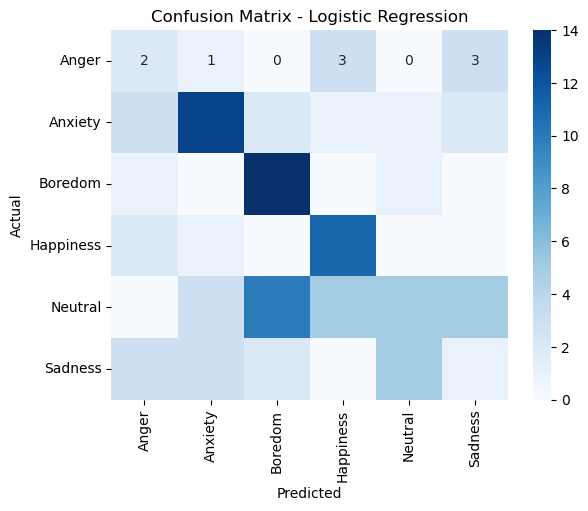

In [34]:
#visualizing the conf matrix for logistic regression
conf_matrix_log_reg = confusion_matrix(y_test_final, y_pred_log_reg_test)
sns.heatmap(conf_matrix_log_reg, annot=True, fmt='d', cmap='Blues',
            xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix - Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

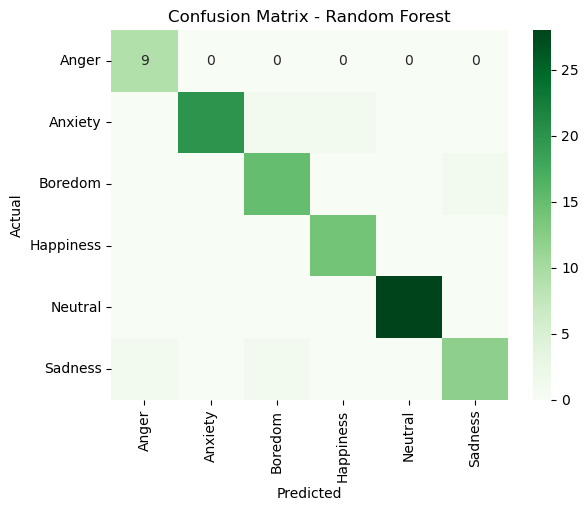

In [35]:
#visualizing confusion matrix for random forest 
conf_matrix_rf = confusion_matrix(y_test_final, y_pred_rf_test)
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Greens',
            xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [36]:
test_df['Predicted_Emotion'] = y_pred_rf_test

In [37]:
test_df.to_csv('test_df_with_predictions.csv', index=False)
train_df.to_csv('cleaned_train_df.csv', index=False)
#Classification report
log_reg_report = classification_report(y_test, y_pred_log_reg, output_dict=True)
log_reg_report_df=pd.DataFrame(log_reg_report).transpose()
log_reg_report_df.to_csv('log_reg_classification_report.csv')

In [38]:
rf_report = classification_report(y_test, y_pred_rf, output_dict=True)
rf_report_df = pd.DataFrame(rf_report).transpose()
rf_report_df.to_csv('rf_classification_report.csv')

In [39]:
#Confusion Matrix
conf_matrix_log_reg_df = pd.DataFrame(conf_matrix_log_reg, index=label_encoder.classes_, columns = label_encoder.classes_)
conf_matrix_log_reg_df.to_csv('conf_matrix_log_reg.csv')
conf_matrix_rf_df = pd.DataFrame(conf_matrix_rf, index=label_encoder.classes_, columns = label_encoder.classes_)
conf_matrix_rf_df.to_csv('conf_matrix_rf.csv')


In [40]:
#Feature Importance (Random Forest)
feature_importance.to_csv('feature_importance.csv')

In [41]:
#p_value
p_values = logit_model.pvalues


In [42]:
p_values_df = p_values.reset_index()
print(p_values_df)

                        index             0             1             2  \
0                       const  5.724019e-01  4.972789e-07  4.162392e-07   
1               Posts_Per_Day  4.102468e-07  8.448905e-01  4.376438e-02   
2  Daily_Usage_Time (minutes)  1.708345e-01  1.867709e-04  2.826474e-09   
3      Likes_Received_Per_Day  2.202762e-06  1.571493e-02  2.843378e-03   
4   Comments_Received_Per_Day  3.674410e-08  1.511627e-03  5.632959e-02   
5       Messages_Sent_Per_Day  7.233066e-02  7.389574e-02  3.967213e-03   

              3             4  
0  5.996613e-06  1.588842e-02  
1  5.263077e-02  8.638473e-01  
2  3.813048e-02  7.647083e-01  
3  1.729492e-06  2.286632e-05  
4  7.833783e-15  5.914751e-15  
5  1.351438e-01  3.937222e-01  


In [43]:
p_values_df.columns = ['Feature','Anger','Anxiety','Boredom','Happiness','Neutral']

In [44]:
p_values_df.to_csv('p_values.csv',index=False)